# FIT9133 Module 4: Programming Exercise Part A
In this first exercise for Module 4, you will get to explore further on **searching** and **sorting** algorithms.

## Part 1: Searching Algorithms

The theory of **searching** is at the centre of database and data research. Searching allows for the _retrieval_ of useful data and for its organisation, most namely in the form of **sorting**. We start with searching because it leads directly to applications of sorting. 

The theory of basic searching is simple: **Linear Search** finds items by probing one item at a time in the order that they appear in the list until the desired element is found, or the end of the list is reached. The second search that was discussed is **Binary Search**, which suggests that if we probe for an item, we can know what we are looking for (if it exists) will be either the current item that we are looking at, or lies on the left or right of that item.

It can be seen is that Linear Search is universal. If the element exists in the list being searched then it will be found, irrelevant of how the list is constructed. For Binary Search to work the list must be sorted. Starting at the centre (or close to the centre) of the list, the probing can be done with a more efficient procedure.

However, the question that should be asked: *is it worth sorting the list to use Binary Search over Linear Search?*


### Task 1

Have a think and suggest which searching method you would use for the following scenarios.

1. **Find 1 number from a sorted list of integers**
2. **Gather all photos of a cat from many cat pictures**
3. **Find all numbers greater than 5 from a list of unsorted integers**
4. **Obtain the smallest number from a sorted list of integers**

There are many possible answers, but arguments will suggest that one searching method is better than another depending on the scenario (and maybe that neither is an acceptable method). 


### Task 2

The code for the two searching methods have been provided for you in the Alexandria notes. Your next task is to take both of those methods and run them on both of the following lists, searching for the integer "**8**":

In [30]:
list_1 = [1,2,3,4,5,6,7,8]

list_2 = [8,3,4,2,6,1,5,7]

list_3 = ['a','b','d','f','h','k']

list_4 = ['x','q','b','s','u','y']

In [33]:
# Your solution for Task 2 (Linear Search)
def linearsearch(list_, elem):
    for num in list_:
        if elem == num:
            return True
    return False

linearsearch(list_4, 'u')

True

In [38]:
# Your solution for Task 2 (Binary Search)
def binarysearch(list_, elem):
    l = 0
    r = len(list_)-1
    while l <= r:
        m = int(l + (r-l)/2)
        
        if list_[m] == elem:
            return True
        elif list_[m] < elem:
            l = m + 1
        else:
            r = m - 1
    return False

binarysearch(list_4, 'q')

False

**Why did Binary Search fail on the second list?** 


The fundamental basis of Binary Search is that it exploits the sorted state of the list. When the list is not sorted, the contention of "everything less than the current middle element is to the left, and everything greater is to the right" no longer applies. Thus, we return to the original question of **is it worth sorting a list to use Binary Search?** It is worth discussing. There are many arguments on the topic that are usually based around the length of the list, and the number of times an item is to be searched for. Discuss it on the forums.

## Part 2: Sorting Algorithms

**Bubble Sort**, **Insertion Sort**, and **Selection Sort** have been explained in detail in the content of Alexandria. Below is the code that will allow the exploration of the time each algorithm will take given an increasing amount of items in a random or particular order.

Run the code below to see how the time of Bubble Sort increases given an increase in items. Change the sorting method to see how long each method takes. (Note that this may take some time depending on the efficiency of your machine. You may wish to think about adding something to the code to tell you how far along it is in its calculation.)

After this, try the following:

* Add in a way for the sorting methods to be run in the same script on the same starting list. You will need to find a way to take a clone of a list (not a copy!)
* Plot the run times of each sorting method against each other.
* Change the list creation to create a list of just 1's. See how it changes the presented times.
* Change the code to take the average of many runs for a given list size. (This is more accurate because it allows the errors of a "bad run" to be mitigated over other runs.)

In [43]:
from random import random
from time import clock   # useful module for timing and time-based operations
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/home/dhruv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/dhruv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


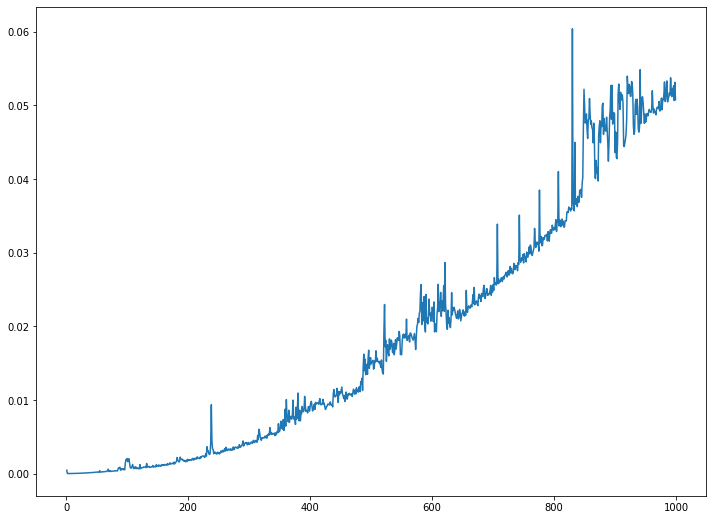

In [47]:
# sorts the list in an ascending order using bubble sort
def bubble_sort(the_list):
    # obtain the length of the list 
    n = len(the_list)
     
    # perform n-1 iterations on the entire list
    for i in range(n-1, 0, -1): 
        # for each iteration, move the largest item to the end
        for j in range(i):
            if the_list[j] > the_list[j+1]:
                # swap if two adjacent items are out of order
                temp = the_list[j]
                the_list[j] = the_list[j+1]
                the_list[j+1] = temp
                
                
# sorts the list in an ascending order using selection sort
def selection_sort(the_list):
    # obtain the length of the list 
    n = len(the_list)
 
    # perform n-1 iterations on the entire list
    for i in range(n-1): 
        # assume the item at index i is the smallest
        smallest = i
        # check if any other item is smaller than the current smallest
        for j in range(i+1, n):
            if the_list[j] < the_list[smallest]:
                smallest = j  # update the current j as the smallest
 
        # place the smallest item in the correct position
        the_list[smallest], the_list[i] = the_list[i], the_list[smallest]

        
# sorts the list in an ascending order using insertion sort
def insertion_sort(the_list):
    # obtain the length of the list
    n = len(the_list)
 
    # begin with the first item of the list
    # treat it as the only item in the sorted sublist
    for i in range(1, n):
        # indicate the current item to be positioned
        current_item = the_list[i]
 
        # find the correct position where the current item
        # should be placed in the sorted sublist       
        pos = i
        while pos > 0 and the_list[pos-1] > current_item:
            # shift items in the sorted sublist that are
            # larger than the current item to the right
            the_list[pos] = the_list[pos-1]
            pos -= 1
 
        # place the current item at its correct position
        the_list[pos] = current_item
        
        
# the main code begins from here        
total = 1

times = []

# increase the number of items with each iteration
while total < 1000:
        
    random_items = []
    
    # generates a list of total items at random between 0 and 1 not including 1
    for i in range(total):
        item = random()
        random_items.append(item)
        
    # this block of code measures the time it takes to sort the items
    # get the time before sorting
    start_time = clock()
    # replace this with a sort of your choice
    bubble_sort(random_items)
    # get the time after sorting
    end_time = clock()
    
    total += 1
    
    times.append(end_time - start_time)
    
# plot the 1000 run times    
x_values = np.arange(1., 1000.)
# print(times)
plt.figure(figsize=(12, 9))
plt.plot(x_values, times)
plt.show()


In [49]:
# sorts the list in an ascending order using bubble sort
def bubble_sort(the_list):
    # obtain the length of the list 
    n = len(the_list)
     
    # perform n-1 iterations on the entire list
    for i in range(n-1, 0, -1): 
        # for each iteration, move the largest item to the end
        for j in range(i):
            if the_list[j] > the_list[j+1]:
                # swap if two adjacent items are out of order
                temp = the_list[j]
                the_list[j] = the_list[j+1]
                the_list[j+1] = temp
                
                
# sorts the list in an ascending order using selection sort
def selection_sort(the_list):
    # obtain the length of the list 
    n = len(the_list)
 
    # perform n-1 iterations on the entire list
    for i in range(n-1): 
        # assume the item at index i is the smallest
        smallest = i
        # check if any other item is smaller than the current smallest
        for j in range(i+1, n):
            if the_list[j] < the_list[smallest]:
                smallest = j  # update the current j as the smallest
 
        # place the smallest item in the correct position
        the_list[smallest], the_list[i] = the_list[i], the_list[smallest]

        
# sorts the list in an ascending order using insertion sort
def insertion_sort(the_list):
    # obtain the length of the list
    n = len(the_list)
 
    # begin with the first item of the list
    # treat it as the only item in the sorted sublist
    for i in range(1, n):
        # indicate the current item to be positioned
        current_item = the_list[i]
 
        # find the correct position where the current item
        # should be placed in the sorted sublist       
        pos = i
        while pos > 0 and the_list[pos-1] > current_item:
            # shift items in the sorted sublist that are
            # larger than the current item to the right
            the_list[pos] = the_list[pos-1]
            pos -= 1
 
        # place the current item at its correct position
        the_list[pos] = current_item
        
        


/home/dhruv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/dhruv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


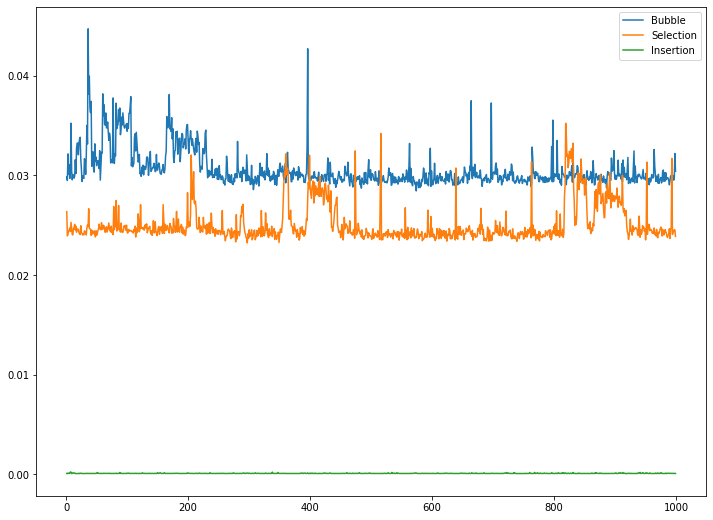

In [64]:
# the main code begins from here
plt.figure(figsize=(12, 9))
sorts = {"Bubble": bubble_sort, "Selection": selection_sort, "Insertion": insertion_sort}
avg_list = {}
for z in sorts.keys():
    total = 1

    times = []

    # increase the number of items with each iteration
    while total < 1000:

        random_items = []

        # generates a list of total items at random between 0 and 1 not including 1
        for i in range(total):
#             item = random()
            item = 1
            random_items.append(item)

        # this block of code measures the time it takes to sort the items
        # get the time before sorting
        start_time = clock()
        # replace this with a sort of your choice
        sorts[z](random_items)
#         bubble_sort(random_items)
        # get the time after sorting
        end_time = clock()

        total += 1

        times.append(end_time - start_time)

    # plot the 1000 run times    
    x_values = np.arange(1., 1000.)
#     avg_list[z] = sum(times)/len(times)
    plt.plot(x_values, times, label = z)
    
plt.legend(sorts.keys())
plt.show()
# print(avg_list)

**Note:** You are required to edit the above code to explore the three sorting methods.